In [80]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Task 1: Data dimensionality, distance-based classifiers

In [50]:
#load the csv into numpy array
train_in = np.loadtxt("data/train_in.csv", delimiter = ',')
train_out = np.loadtxt("data/train_out.csv", delimiter = ',')
test_in = np.loadtxt("data/test_in.csv", delimiter = ',')
test_out = np.loadtxt("data/test_out.csv", delimiter = ',')


1. Classify hand-written digits. 
   
In this question, we will develop our own classifier and compare it to other classifiers. We first explore the datasets. Each row represents one image and each column reprents one dimension, in other words, one row represents an image with $16\times16 = 256$ dimensions. 

The classifier function is straitforward. The input for our function is the training dataset, training labels and test dataset. In the first step, we calculate the center for each category digit, namely from $0$ to $9$, where the center is the mean acrossing all the row vectors that belong to that specific digit category. Secondly, for each row vector, we calculate the Euclidean distances with looping through each of the $10$ centers. Then we locate the index of the smallest Euclidean distance, which also indicates the digit category for this row vector(image). In the final step, the distance matrix has been made for each pair of the centers. 

In order to test our classify_digits function, we supply the training dataset and training labels to check the results. The distance matrix for each pair of centers shows generally quite short distances for each of the pairs, where the highest distance is $0.4117$ between digit $1$ and digit $0$, on the other hand, the lowest distance is $0.000111$ between digit $2$ and digit $8$. In other words, $0$ and $1$ are easiest to distiguish, while $2$ and $8$ are the hardest pair to distinguish.

Overall the average distance across all the distances is $0.11598$, which obviously indicates that this classifier could be really naive and makes it difficult to distinguish between different hand-written digits. 

In [51]:
def classify_digits(dt_in,dt_out,test_in):
    center = []
    for i in range(10):
        center.append(np.mean(dt_in[dt_out==i])) #the center of the cloud for each digit
    print(center)

    center_to_points = []
    for row in test_in:
        for c in center:
            center_to_points.append(np.linalg.norm(row-c)) 
     #calculate the Euclidean distance for a vector to each of the centers     
            
    #print(len(center_to_points))
    
    
    each_vector_dist = [center_to_points[m: m + 10] for m in range(0, len(center_to_points),10)]
    #print(each_vector_dist)
    
    category = [np.argmin(v) for v in each_vector_dist]
        #np.argmin(v) is the center that represents the image
    
    count = 0
    target = list(dt_out.astype(int))
    for d1,d2 in zip(category, target):
        if d1 == d2:
            count = count+1
    
    print(count/len(category))
    
    
    
    center_row, center_col = np.meshgrid(center, center)
    dist = abs(center_row - center_col)
    
    #print(np.max(dist))
    #print(np.mean(dist))
     
    return category, pd.DataFrame(dist)



In [ ]:
centre = []
for digit in range(0,10):
    filter = np.asarray(train_out.values == digit) #filtering all numbers of the same value 
    centre.append(np.mean(train_in[filter], axis = 0)) # calculating the average distance for all those numbers
    centre = np.array(centre).reshape (256, -1)
    
 
    distances = np.full((10,10),-1,dtype='float')
    classes = []

    for i,j in itertools.combinations_with_replacement (range(0,10),r = 2):
        distances[i][j] = np.linalg.norm(centre[j]-centre[i])    # Calculating Euclidean distance

    plt.rcParams["figure.figsize"] = (8,7)
    sns.heatmap(distances, cmap = 'Greys', cbar = True, square=True, fmt='0.1f', annot = True)
    plt.xlabel('Digits')
    plt.ylabel('Digits')
    #plt.savefig("Distance.pdf", bbox_inches ="tight")

In [4]:
classify_digits(train_in, train_out, train_in)

[-0.2904289895180251, -0.7021363002232144, -0.4393272547957921, -0.43520774689885494, -0.5541821849385247, -0.41062397904829545, -0.49547837334437084, -0.573439076618976, -0.43921579318576387, -0.5403370620265151]
0.30052724077328646


([0,
  0,
  9,
  7,
  5,
  7,
  7,
  1,
  5,
  1,
  6,
  0,
  1,
  1,
  1,
  7,
  7,
  0,
  0,
  1,
  7,
  2,
  7,
  7,
  3,
  1,
  3,
  7,
  7,
  1,
  5,
  7,
  1,
  1,
  1,
  1,
  1,
  7,
  0,
  7,
  5,
  5,
  9,
  2,
  1,
  6,
  6,
  1,
  4,
  2,
  4,
  6,
  1,
  1,
  7,
  1,
  1,
  9,
  0,
  0,
  4,
  3,
  2,
  0,
  1,
  5,
  9,
  3,
  0,
  0,
  7,
  0,
  0,
  0,
  5,
  2,
  7,
  5,
  1,
  6,
  0,
  0,
  1,
  7,
  5,
  0,
  2,
  0,
  0,
  5,
  6,
  0,
  1,
  6,
  7,
  0,
  6,
  5,
  6,
  7,
  6,
  5,
  5,
  0,
  5,
  2,
  0,
  7,
  0,
  6,
  0,
  0,
  1,
  5,
  5,
  5,
  0,
  6,
  4,
  5,
  0,
  0,
  0,
  5,
  1,
  5,
  1,
  5,
  0,
  7,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  7,
  0,
  0,
  7,
  2,
  0,
  0,
  1,
  6,
  0,
  0,
  5,
  7,
  8,
  0,
  6,
  5,
  5,
  6,
  0,
  0,
  5,
  5,
  6,
  5,
  6,
  0,
  5,
  0,
  0,
  3,
  1,
  0,
  2,
  1,
  3,
  0,
  0,
  9,
  0,
  5,
  7,
  1,
  0,
  6,
  9,
  7,
  1,
  0,
  1,
  0,
  0,
  0,
  7,
  6,
  5,
  5,
  7,
  7,
  1,
  1,
  7,
  0,


In [1]:
#list(train_out.astype(int))



In [227]:
center = []
for i in range(10):
    center.append(np.mean(train_in[train_out==i])) #the center of the cloud for each digit
print(center)

li = []
for ci in center:
    li.append(np.linalg.norm(train_in[0]-ci))

print(np.argmin(li))
print(li)

[-0.2904289895180251, -0.7021363002232144, -0.4393272547957921, -0.43520774689885494, -0.5541821849385247, -0.41062397904829545, -0.49547837334437084, -0.573439076618976, -0.43921579318576387, -0.5403370620265151]
0
[13.533534440177776, 14.858539372442062, 13.665443544486921, 13.656222114738895, 14.045175128593524, 13.60770102687018, 13.821897939731906, 14.131253711910162, 13.665189937394901, 13.9871544492216]


(10, 1707)

# Task 2: Implement a multi-class perceptron algorithm

In this task, we are going to applying multi-class single perceptron algorithm to classify digits from the MINST dataset. The basic idea behind this algorithm is to find the optimal weights for each subject, in our case, the images. Based on our training data set, for each image, there are $265$ features plusing one biased feature, in addition to the $10$ perceptrons, one for each digit, thus the weight matrix should contain $265 + 1$ rows and $10$ columns. 

In the first step of our experiment, we write the function to find the optimum weights. For the input dataset, one column with all $1$ is added up for the purpose of initializing bias. Now the dimension of the input dataset is $1707\times257$. Initializing the weights is more random, we will at first try a $257\times10$ numpy array with all zeros, pending to change later on for the experimental purpose. For the body of this weights updating funciton, the core idea behind is minimizing costs after each iteration. In order to minimize costs, we have to choose a proper learning rate. To be more clear and specific, the weights updating rule is $\eta\Sigma(y_i -\hat{y_i})x_i$, where $\eta$ is the chosen learning rate, $\Sigma(y_i -\hat{y_i})$ is the sum of costs and $x_i$ is the input data. 

Until this point, every step seems quite similar to the single perceptron weights updating rule for binary classes, which means $0$ and $1$ or $-1$ and $1$. However, the case of multi-class perceptron weight updating algorithm is different from the binary-class one in some aspects. To be more in details, after calculating the dot product for training data and initialled weights, the activation button is the highest value among all the classes(perceptrons). In other words, for each image, there are $10$ classes(perceptrons). We will choose the class(perceptron) with the highest dot product value. This is the reason why matrix is much faster than for loop. Subsequently, for error calculations we have to transform each class digit into $0$ and $1$. The method is to make an indicator matrix for all the images in the traing dataset, which is also called one hot encoding. If one image is classifed as a specific digit, we mark that digit class as $1$, all the other digit classes as $0$. Following the same way, the actual digit classes for each image is as well one hot encoded. Hence, we can update all the weights at the same time by multiplying an error matrix, which is the indicator matrix of actual digit classes minus the indicator matrix of predicted digit classes. At this step, we intentionally use actual digit classed minus predicted digit classes for the reason that if one image is misclassified, its weight will be updated by plus $1$ in the correct class and minus $1$ in the wrong class. 

This algoritm generally predicts well. We tried three different weights initializations, one with all zeros, the second with all ones and the third with random numbers between $0$ and $1$. Except for different weights values, the results are basically the same. Here the key point is actually at the learning rate. We found out that with bigger learnig rate, the algorithm converges faster with accuracy rate almost equals to $1$. On the other hand, with a smaller learning rate, we have to make the function running more iterations until it converges with prediction accuracy rate close to $1$. If the number of iterations is lower, the algorithm will also converge but with a lower prediction accuracy rate. This situation applies to both traing data and test data, but with a slightly lower accuracy estimates in the test dataset when the learning rate and iterations are set to the same as the traing dataset. Overall, this multi-class perceptron method performs much better than the distance-based classifier.

In [348]:
from sklearn import metrics

def weights_optim(dt_in, dt_out, learning_rate, n_iter):
    
    dt_new = np.hstack((np.ones((len(dt_in),1)), dt_in))
    #weights = np.zeros((dt_in.shape[1]+1,10)) #initialize the weights, we have 10 outputs
    #weights = np.ones((dt_in.shape[1]+1,10))
    weights = np.random.random((dt_in.shape[1]+1,10))
    
    target = np.arange(10)
    
    for n in range(n_iter):
        
        w_x = np.dot(dt_new, weights) #dot product of weights * training data
        
        y_pred = np.argmax(w_x, axis = 1) #the predicted digits 
        #print(y_pred)
        y = dt_out.astype(int).flatten() #the actual digits of y 
        
        indicator_y = (y[:,None] == target).astype(float) #one hot encoding for actual y
        indicator_ypred = (y_pred[:,None] == target).astype(float) #one hot encoding for predicted y
        
        error = indicator_y - indicator_ypred  #real values - predicted values
        
        weights = weights + learning_rate * np.dot(dt_new.T, error) #updating the weights
        
        accuracy_rate = np.mean(y_pred == y)
        
    
    con_mat = metrics.confusion_matrix(y, y_pred, labels = range(10)) #confusion matrix of target and predicted values
    sns.heatmap(con_mat, annot = True, fmt="d",cmap="Greens")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.scatter(y,y_pred)
    plt.show()
    
    print("weights :",weights, "predicted:", y_pred, "accuracy rate:", accuracy_rate)
    
    #return weights, y_pred, accuracy_rate
    
    
    
    
    
        
    
    

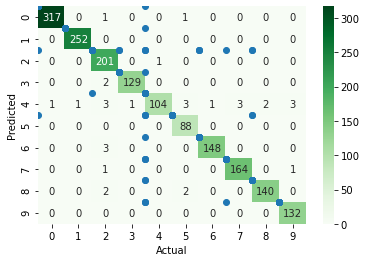

weights : [[0.23073267 0.38974699 0.95575051 ... 0.60761104 0.13133166 0.05855628]
 [0.76994415 1.02509902 0.36343211 ... 0.91411712 0.20365548 0.99484148]
 [0.61931666 0.67663889 0.30208213 ... 0.74854755 0.5490804  0.44340192]
 ...
 [0.69256509 0.7364885  0.76261756 ... 0.55082064 0.55755627 0.48803439]
 [0.25666012 0.35346534 0.28149923 ... 0.3077966  0.45840545 0.4492503 ]
 [0.37869241 0.78605288 0.55415624 ... 0.34440548 0.60916405 0.81990614]] predicted: [6 5 4 ... 7 9 8] accuracy rate: 0.981253661394259


In [437]:
weights_optim(train_in, train_out, 0.0001, 800)


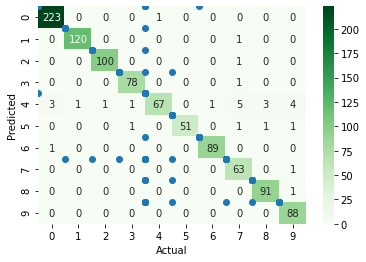

weights : [[ 0.84114637 -0.00376588  0.64310314 ...  0.07557018  0.06818616
   0.75834499]
 [ 0.46671016  0.67631254  0.10211406 ...  0.357147    0.37519314
   0.82739774]
 [ 0.17843779  0.799073    0.85524705 ...  0.81711239  0.85390333
   0.41323712]
 ...
 [ 0.00296351  0.9314645   0.34770852 ...  0.7485826   0.82521255
   0.38434088]
 [ 0.25241702  0.78041283  0.20823691 ...  0.3443197   0.57656891
   0.18748144]
 [ 0.13363031  0.43811305  0.31515675 ...  1.00298987  0.58120949
   0.69491331]] predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 9 0 0 2 9 0 0 9 0 0 0 0 6 0 0 6 0 0 2
 6 0 0 0 0 0 2 0 6 0 9 0 9 0 2 0 2 2 1 2 9 6 1 2 1 6 1 0 1 9 8 6 0 4 8 4 0
 8 4 0 9 2 8 4 6 0 1 2 6 6 6 2 2 0 6 6 8 2 0 1 9 9 9 9 6 6 7 9 9 7 9 9 7 6
 8 2 7 6 8 1 0 1 1 1 6 7 6 8 0 9 4 8 1 8 6 8 0 8 9 0 0 6 7 4 1 3 1 6 9 1 4
 1 8 0 5 2 4 7 0 0 0 1 1 0 0 1 8 1 0 0 0 7 1 0 0 1 7 1 0 0 2 0 1 3 9 3 1 0
 1 0 8 1 0 1 0 1 1 0 0 0 1 1 0 1 6 3 1 0 0 2 2 1 0 0 2 1 1 0 0 3 4 1 0 0 1
 0 1 0 0 0 3 1 0 0 3 6 8 9 1 1 5 8 9 

In [438]:
weights_optim(test_in, test_out, 0.0001, 800)

# Task 3: Implement the XOR network and the Gradient Descent Algorithm

For this task, we are going to write a classification function with an one-layer neural network by applying gradient descent algorithm. Our neural network has two input points $x_1$ and $x_2$, one hidden layer with $2$ nodes and one output layer with output equals to either $0$ or $1$. Sigmoid function is applied for all layers in the neural network.

Based on the given information, the model is straitforward. From input layer to the hidden layer, the connection beween two input data points and two hidden nodes require $6$ weights, where $2$ for bias and $4$ for two inputs connecting two hidden nodes. On the output layer, $3$ weights are needed, where one for bias, two other weights for connecting two hidden nodes to the output node. The mathmatical notations for the model are as follows: $$net_1 = w_1x_1 + w_2x_2 + b_1 , \ y_1 = activation(net_1)  \\ net_2 = v_1x_1 + v_2x_2 + b_2 ,\ y_2 = activation(net_2) \\ net = u_1y_1 + u_2y_2 + b , \ y = activation(net)$$ , where function $y_1$ and $y_2$ are the connections from inputs to hidden layers, function $y$ is the output in the output layer. 

In order to update the weights, we have to calculate gradient for each weight in each layer. The gradient for a weight is just the partial derivative of the mean squared error with respect to that weight. The idea behind is to minimize the errors between predicted values and actual values. Since there are two inputs, the mean squared error is $MSE = \frac{1}{2}(activation(u_1y_1 + u_2y_2 + b) - y_{actual})^2$. The partial derivatives for all the weights are as follows:  $$\frac{\partial{MSE}}{\partial u_1} = (y - y_{actual})\cdot activation'(net)y_1 \\ \frac{\partial{MSE}}{\partial u_2} = (y - y_{actual})\cdot activation'(net)y_2 \\ \frac{\partial{MSE}}{\partial w_1} = (y - y_{actual})\cdot activation'(net)\cdot u_1 activation'(net_1) x_1 \\ \frac{\partial{MSE}}{\partial w_2} = (y - y_{actual})\cdot activation'(net)\cdot u_2 activation'(net_1) x_2 \\ \frac{\partial{MSE}}{\partial v_1} = (y - y_{actual})\cdot activation'(net)\cdot u_1 activation'(net_2) x_1 \\ \frac{\partial{MSE}}{\partial v_2} = (y - y_{actual})\cdot activation'(net)\cdot u_2 activation'(net_2) x_2 \\ \frac{\partial{MSE}}{\partial b_1} = (y - y_{actual})\cdot activation'(net)\cdot u_1 activation'(net_1)\cdot 1 \\ \frac{\partial{MSE}}{\partial b_2} = (y - y_{actual})\cdot activation'(net)\cdot u_2 activation'(net_2) \cdot 1 \\ \frac{\partial{MSE}}{\partial b} = (y - y_{actual})\cdot activation'(net)\cdot 1 $$  
and the Sigmoid activation function is $out(net) = \frac{1}{1 + exp(-net)}$, where its derivative is just $out(net)(1 - out(net))$. 

The core of this algorithm is applying gradient descent to update the weights. As the previous task, the weights updating rule is quite similar, which is $\eta{\frac{\partial MSE}{\partial weight}}x_i$. How to initialize weights is a problem we have to tackle. Because our neural network has two inputs and two nodes, this guarantees the variance of the inputs to be equal to the variance of the output layer, as well as the gradient to have equal variance runing through the whole backpropagation process. Additionally, the chosen activation function is Sigmoid function, hence, based on the Glorot initialization from $fan_{avg} = (fan_{in} + fan_{out})/2$ as the variance, a random normal weights initialization with mean $0$ and variance $\frac{1}{(2+2)/2}$ can be applied. We also choose the learning rate and iterating times as $0.05$ and $500$ respectively. The algorithm converges fast and the prediction is correct with an average mean squared error of $0.1315$. 

For the purpose of experiment, we can try different types of weights initializations and then compare their mean squared errors. So we keep the leaning rate and iterating times the same. If we change the weights initialization into a random uniform distribution with $-\sqrt{\frac{3}{fan_{avg}}}$ and $\sqrt{\frac{3}{fan_{avg}}}$ limits, which is also mentioned by Glorot. The algorithm also converges fast but with a much lower averge mean squared errors of $0.051$. Next we initialize the weights as all ones. The algorithm converges and the average mean squared error is around $0.075$, which is smaller than previous one. At the last run, we initialize the weights as all zeros. At this time the algorithm also converges and the mean squared error is about $0.034$. All four experiments converge and predict accurately with the same learning rate and the number of iterations. However, even though weights initializations with all zeros produce the lowerst mean suqared errors, it might encounter the problem of vanishing gradients because zero does not have derivatives. Thus, we could choose the Glorot initialization with random uniform distribution, which yields the second lowest mean squared error of $0.051$.




In [363]:
def activation_sigmoid(val):
    return 1/(1 + np.exp(-val))

In [364]:
def delta_d(predicted,d):
    return (predicted-d)*(predicted*(1-predicted))

In [387]:
def xor(dt_in, target, learning_rate, n_iter):
    #weights = [0.0 for w in range(10)] #error = 0.034
    weights = np.random.normal(0,np.sqrt(1/2),10)  #error = 0.1315
    #weights = [1.0 for w in range(10)] #error = 0.078
    #weights = np.random.uniform(-np.sqrt(3/2), np.sqrt(3/2),10) #error=0.051
    mse = []
    for iteration in range(n_iter):
        net1 = weights[0] + weights[1]*dt_in[0]+ weights[2]*dt_in[1]
        net2 = weights[3] + weights[4]*dt_in[0] + weights[5]*dt_in[1]
        y1 = activation_sigmoid(net1)
        y2 = activation_sigmoid(net2)
        net_outlayer = weights[6] + weights[7]*y1 + weights[8]*y2
        y = activation_sigmoid(net_outlayer)
        
        w1_d = delta_d(y,target)*weights[7]*(y1*(1-y1))*dt_in[0]
        w2_d = delta_d(y,target)*weights[8]*(y1*(1-y1))*dt_in[1]
        
        v1_d = delta_d(y,target)*weights[7]*(y2*(1-y2))*dt_in[0]
        v2_d = delta_d(y,target)*weights[8]*(y2*(1-y2))*dt_in[1]
        
        u1_d = delta_d(y,target)*y1
        u2_d = delta_d(y,target)*y2
        
        b1_d = delta_d(y,target)*weights[7]*(y1*(1-y1))*1
        b2_d = delta_d(y,target)*weights[8]*(y2*(1-y2))*1
        b_d = delta_d(y,target)*1
        
        weights[0] = weights[0] - learning_rate*b1_d
        weights[1] = weights[1] - learning_rate*w1_d
        weights[2] = weights[2] - learning_rate*w2_d
        
        weights[3] = weights[3] - learning_rate*b2_d
        weights[4] = weights[4] - learning_rate*v1_d
        weights[5] = weights[5] - learning_rate*v2_d
        
        weights[6] = weights[6] - learning_rate*b_d
        weights[7] = weights[7] - learning_rate*u1_d
        weights[8] = weights[8] - learning_rate*u2_d
        
        mse.append(((y-target)**2)/2)
        
    if y > 0.5:
        print('When y > 0.5, predicted value is  : {}'. format(1))
    else:
        print('When y < 0.5, predicted value is : {}'. format(0))
        
    print("y1:{}, y2:{}, y:{}, mse:{}".format(y1,y2,y,np.mean(mse)))
    plt.plot(mse)
    plt.xlabel("epoch")
    plt.ylabel("mse")
    plt.show()
        
        
    
    return 1 if y > 0.5 else 0, weights, np.mean(mse)
        
        
    
    

In [388]:
input_vectors = {(0,0): 0, (0,1): 1, (1,0): 1, (1,1): 0} 

When y < 0.5, predicted value is : 0
y1:0.5948102187089381, y2:0.6340563042669708, y:0.09788137284123812, mse:0.059965384952377764


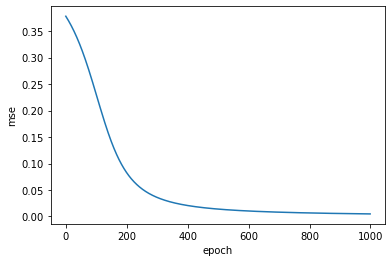

(0, array([ 0.38397801, -0.93092806, -0.76159161,  0.54968776, -0.65261021,
       -0.89086543, -1.51429092, -0.87563433, -0.29432934, -0.84758082]), 0.059965384952377764)
When y > 0.5, predicted value is  : 1
y1:0.45394293731074314, y2:0.6689291429634252, y:0.907171836700192, mse:0.023396966789093955


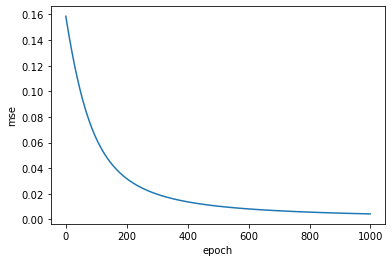

(1, array([-0.15169764,  0.14577663, -0.03296085,  0.35939637, -0.81854998,
        0.34413571,  1.61050732, -0.11137609,  1.07676453,  0.80645165]), 0.023396966789093955)
When y > 0.5, predicted value is  : 1
y1:0.7164871564565395, y2:0.31820809188366656, y:0.9067667358077014, mse:0.024300539207945247


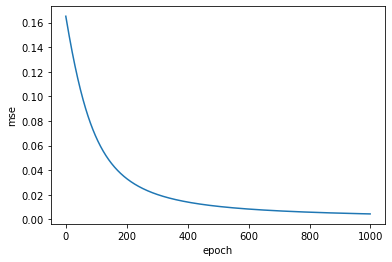

(1, array([ 1.11808082, -0.19075782,  0.01444716, -1.14622268,  0.38426207,
        0.75426168,  1.51055216,  1.37500948, -0.69235135, -0.16072164]), 0.024300539207945247)
When y < 0.5, predicted value is : 0
y1:0.08455490628434567, y2:0.7662563038844923, y:0.09803563812868242, mse:0.036953284506508165


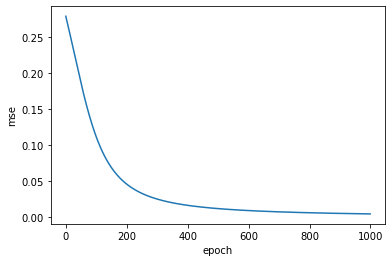

(0, array([-0.70953913, -1.12682796, -0.54570306,  0.20573217,  0.65399197,
        0.32763441, -1.4417659 ,  1.49724598, -1.18076493, -0.22316027]), 0.036953284506508165)


In [394]:
for vec, tg in input_vectors.items():
    print(xor(vec, tg, 0.05, 1000))

Since the Sigmoid activation function suffers the proplem of vanishing gradients when flowing through backpropagation, hence for the experiment, we check another activation function to see if there is any difference. Rectified linear unit (Relu) is a popular activation function. It can mitigate the problem of vanishing gradients. Relu activation function returns the largest value between $0$ and the calculated values. Hence its derivative is $0$ when the value is smaller than $0$ or $1$ if the value is larger than $0$. We only adjust our previous xor function with relu activation function, all the other elements stay the same. 

We keep the weights initializations, learning rate and iterating times as the same as the previous functions. The results reveal that this xor_relu function converges and predicts well. Generally, the average of mse is much lower than the previous function with Sigmoid activation. And weights initialization with all ones takes the highest mse equals to $0.030$, which is still much smaller than the average mse from the previous xor function. The reason that Relu activation function fits better for our model is probably because the input and ourput data are only $0$ and $1$. Nevertheless, there is one suitable way to initialize weights for Relu activation, which is He initialization. The method is to generate random normal data with mean equals to $0$ and variance equals to $2/fan_{in}$, where $fan_{in} = 2$ in our case. The results show that it converges and predicts accurately with the average mse of $0.0028$.

In summary, we can conclude that Relu activation function overall works better and more efficiently than the Sigmoid activation function. However, the learning rate and interating times also play important roles. We found out that if we set a small learning rate, it will take longer iterations to converge. Sometimes, when the interations are not long enough, the algorithm might be stuck in some local minima points and never converge to the true target values. 

In [408]:
def activation_relu(val):
    return max(0,val)

In [409]:
def relu_derivative(v):
    return 0 if v < 0 else 1

In [423]:
def xor_relu(dt_in, target, learning_rate, n_iter):
    #weights = [0.0 for w in range(10)] #error = 0.00512
    #weights = np.random.normal(0,np.sqrt(1/2),10)  #error = 0.00579
    #weights = [1.0 for w in range(10)] #error = 0.030
    #weights = np.random.uniform(-np.sqrt(3/2), np.sqrt(3/2),10) #error=0.00229
    weights = np.random.normal(0,np.sqrt(2/2),10) #error = 0.0028
    mse = []
    for iteration in range(n_iter):
        net1 = weights[0] + weights[1]*dt_in[0]+ weights[2]*dt_in[1]
        net2 = weights[3] + weights[4]*dt_in[0] + weights[5]*dt_in[1]
        y1 = activation_relu(net1)
        y2 = activation_relu(net2)
        net_outlayer = weights[6] + weights[7]*y1 + weights[8]*y2
        y = activation_relu(net_outlayer)
        
        w1_d = (y-target)*relu_derivative(y)*weights[7]*relu_derivative(y1)*dt_in[0]
        w2_d = (y-target)*relu_derivative(y)*weights[8]*relu_derivative(y1)*dt_in[1]
        
        v1_d = (y-target)*relu_derivative(y)*weights[7]*relu_derivative(y2)*dt_in[0]
        v2_d = (y-target)*relu_derivative(y)*weights[8]*relu_derivative(y2)*dt_in[1]
        
        u1_d = (y-target)*relu_derivative(y)*y1
        u2_d = (y-target)*relu_derivative(y)*y2
        
        b1_d = (y-target)*relu_derivative(y)*weights[7]*relu_derivative(y1)*1
        b2_d = (y-target)*relu_derivative(y)*weights[8]*relu_derivative(y2)*1
        b_d = (y-target)*relu_derivative(y)*1
        
        weights[0] = weights[0] - learning_rate*b1_d
        weights[1] = weights[1] - learning_rate*w1_d
        weights[2] = weights[2] - learning_rate*w2_d
        
        weights[3] = weights[3] - learning_rate*b2_d
        weights[4] = weights[4] - learning_rate*v1_d
        weights[5] = weights[5] - learning_rate*v2_d
        
        weights[6] = weights[6] - learning_rate*b_d
        weights[7] = weights[7] - learning_rate*u1_d
        weights[8] = weights[8] - learning_rate*u2_d
        
        mse.append(((y-target)**2)/2)
        
    if y > 0.5:
        print('When y > 0.5, predicted value is  : {}'. format(1))
    else:
        print('When y < 0.5, predicted value is : {}'. format(0))
        
    print("y1:{}, y2:{}, y:{}, mse:{}".format(y1,y2,y,np.mean(mse)))
    plt.plot(mse)
    plt.xlabel("epoch")
    plt.ylabel("mse")
    plt.show()
        
        
    
    return 1 if y > 0.5 else 0, weights, np.mean(mse)
    #return y, weights, np.mean(mse)
        
        

When y < 0.5, predicted value is : 0
y1:0.6138702212020353, y2:0, y:0.0007119832730702325, mse:0.038531738359239204


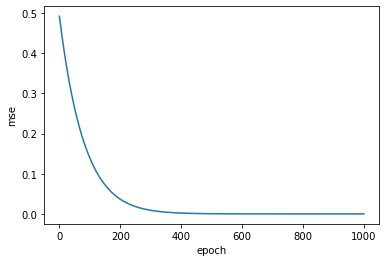

(0, array([ 0.6138715 ,  1.04586283,  0.95980008, -3.10915157,  2.08285514,
       -0.72807914,  0.22126941, -0.35929797,  2.45970966,  0.03519614]), 0.038531738359239204)
When y > 0.5, predicted value is  : 1
y1:0, y2:0, y:0.9990514373379268, mse:0.0010084505157670065


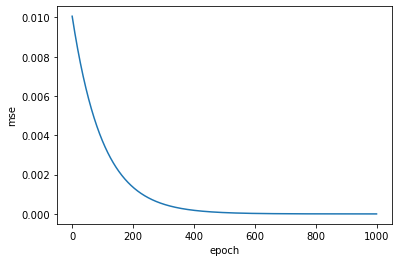

(1, array([-1.88902337, -0.32349769,  0.26875985, -1.19786089,  2.66869613,
       -0.01660887,  0.99905618, -1.59211467,  1.87294421,  1.94249689]), 0.0010084505157670065)
When y > 0.5, predicted value is  : 1
y1:0.7219557747119982, y2:0.38398726463878385, y:0.9998952331200817, mse:0.15472083141490028


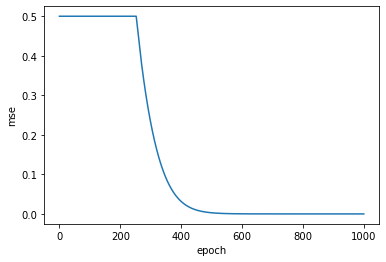

(1, array([ 0.39706456,  0.32489198, -1.27451248, -1.39674213,  1.78072968,
       -1.51719829,  0.54146571,  0.73096031, -0.18045032, -0.37934573]), 0.15472083141490028)
When y < 0.5, predicted value is : 0
y1:4.3638920323999955, y2:0, y:0, mse:0.0


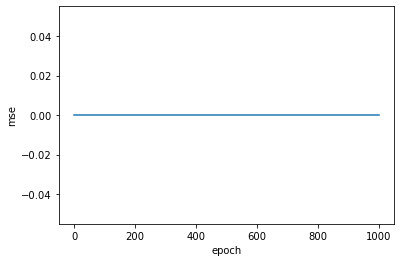

(0, array([ 1.3904251 ,  0.09789443,  2.8755725 , -0.10768525,  0.33619981,
       -0.34726864, -1.95918949, -1.16642626, -0.81037277,  2.17276586]), 0.0)


In [425]:
for vec, tg in input_vectors.items():
    print(xor_relu(vec, tg, 0.005, 1000))